In [1]:
import turicreate as tc

In [43]:
products=tc.SFrame.read_csv('amazon_baby.csv')

Finished parsing file amazon_baby.csv

Parsing completed. Parsed 100 lines in 0.806549 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 105270 lines. Lines per second: 85113.8

Finished parsing file amazon_baby.csv

Parsing completed. Parsed 183531 lines in 1.71444 secs.

In [44]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4


In [45]:
products.groupby('name',operations={'count':tc.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


In [46]:
products["word_count"]=tc.text_analytics.count_words(products["review"])

In [47]:
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5,"{'quilt': 1.0,'comfortable': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


In [70]:
y=[]
for i in range(0,100):
    y.append(i*1200)
    
y2 = tc.SArray(y)
tc.show(y2,products["name"][:100])

Materializing X axis SArray

Materializing Y axis SArray

In [49]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [50]:
len(giraffe_reviews)

785

In [71]:
giraffe_reviews

name,review,rating,word_count
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5,"{'purchase': 1.0,'teething': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ..."
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ..."
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5,"{'disappointed': 1.0,'will': 1.0, 'take': ..."
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ..."
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ..."
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ..."


In [72]:
giraffe_reviews['rating'].show()

Materializing SArray

In [77]:
products["rating"].show()

Materializing SArray

In [78]:
# Let's ignore 3 star products because they seem to be neutral in opinion
products=products[products["rating"]!=3]

In [79]:
# Define positive sentiment = 4-star or 5-star reviews
products["sentiment"]=products["rating"]>=4

In [80]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5,"{'quilt': 1.0,'comfortable': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4,"{'tracker': 1.0,'recommend': 1.0, ...",1


In [81]:
# Let's look at the distribution of the sentiments across the dataframe
products['sentiment'].show()

Materializing SArray

In [82]:
train_data,test_data=products.random_split(.8,seed=0)

In [83]:
sentiment_model = tc.logistic_classifier.create(train_data,
                                                        target='sentiment', 
                                                        features=['word_count'], 
                                                        validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 2.077144     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 4.119874     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 5.049991     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 6.046918     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 7.750776     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 12.203292    | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [106]:
ev=sentiment_model.evaluate(test_data, metric='roc_curve')

In [107]:
ev

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   0.001   | 0.698948948948949  | 0.9933514440949385 | 27976 | 5328 |
 |   0.002   | 0.6619744744744744 | 0.9922076065198742 | 27976 | 5328 |
 |   0.003   | 0.6385135135135135 | 0.9909922790963683 | 27976 | 5328 |
 |   0.004   |  0.62256006006006  | 0.9903846153846154 | 27976 | 5328 |
 |   0.005   | 0.6112987987987988 | 0.989848441521304  | 27976 | 5328 |
 |   0.006   | 0.6002252252252253 | 0.9894195024306548 | 27976 | 5328 |
 |   0.007   | 0.589527027027027  | 0.9888475836431226 | 27976 | 5328 |
 |   0.008   | 0.5816441441441441 | 0.9883828996282528 | 27976 | 5328 |
 |   0.009   | 0.574512012012012

In [109]:
tc.evaluation.roc_curve.(model=sentiment_model) 

SyntaxError: invalid syntax (<ipython-input-109-1c486c3f338c>, line 1)

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline


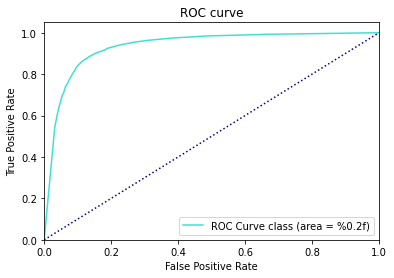

In [119]:
plt.plot(ev['roc_curve']['fpr'],
         ev['roc_curve']['tpr'],
         color ='turquoise',
         label='ROC Curve class (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [121]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type = 'probability')

In [122]:
giraffe_reviews

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5,"{'purchase': 1.0,'teething': 1.0, ...",0.9993655365682315
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",0.9998633791689631
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0.25452681978058633
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",0.9165688083914842
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5,"{'disappointed': 1.0,'will': 1.0, 'take': ...",0.6855768205884274
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",0.99999994452112
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",0.997935118109351
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",0.9999745004834385
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",0.9460144428356572
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ...",0.38301136142107506


In [123]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [124]:
giraffe_reviews

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4,"{'explore': 1.0,'adventures': 1.0, ...",1.0
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5,"{'use': 1.0, 'get': 1.0,'will': 1.0, 'where': ...",1.0
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5,"{'09': 1.0, '11': 1.0,'recommended': 1.0, ' ...",1.0
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5,"{'parents': 1.0,'recommend': 1.0, ...",0.9999999999998377
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5,"{'future': 1.0, 'use':1.0, 'am': 1.0, ...",0.9999999999998284
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5,"{'penny': 1.0, 'worth':1.0, 'definitely': 1.0, ...",0.9999999999997958
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4,"{'teether': 1.0, 'want':1.0, 'price': 1.0, ...",0.9999999999994914
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5,"{'must': 1.0, 'nuts':1.0, 'we': 1.0, 'thei ...",0.9999999999941254
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4,"{'well': 1.0, 'natural':1.0, 'makers': 1.0, ...",0.999999999987423
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",0.9999999999829475


In [125]:
giraffe_reviews[0]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

In [126]:
giraffe_reviews[1]['review']

"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face another day of play

In [127]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [128]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 